# Data Wrangling for a Simple Neural Network

This notebook takes a csv from the Snotel network for Bogus Basin (site 978) and converts it to a clean csv in which we have converted Imperial units to SI, created a new column denoting the day of the year for each record, and created a new column containing a categorical variable denoting whether snow is present. If there is more than 1.0 mm of snow water equivalent, then we declare that snow is present (Snow on Ground = 1), otherwise we declare snow to be absent (Snow on Ground = 0).

### 1. Load the libraries and declare input and output file names

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

snotel_fname = 'snotel_978_bogus_basin.txt'
snotel_fname_clean = 'snotel_978_bogus_basin_clean.txt'

### 2. Read in the Data

Make sure that the date variable is of type `datetime64`.

In [2]:
df = pd.read_csv(snotel_fname)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Snow Water Equivalent (in),Accumulated Precipitation (in),Tmax (degF),Tmin (degF),Tmean (degF),Precipitation increment (in)
0,1999-10-01,0.0,0.0,53.1,37.2,45.5,0.0
1,1999-10-02,0.0,0.0,52.9,32.9,43.3,0.0
2,1999-10-03,0.0,0.0,57.9,32.9,46.0,0.0
3,1999-10-04,0.0,0.0,67.5,44.2,56.3,0.0
4,1999-10-05,0.0,0.0,62.4,46.6,54.3,0.0


### 3. Plot the Snow Water Equivalent

To verify the data looks as we expect, plot the snow water equivalent over the period in the CSV file. 

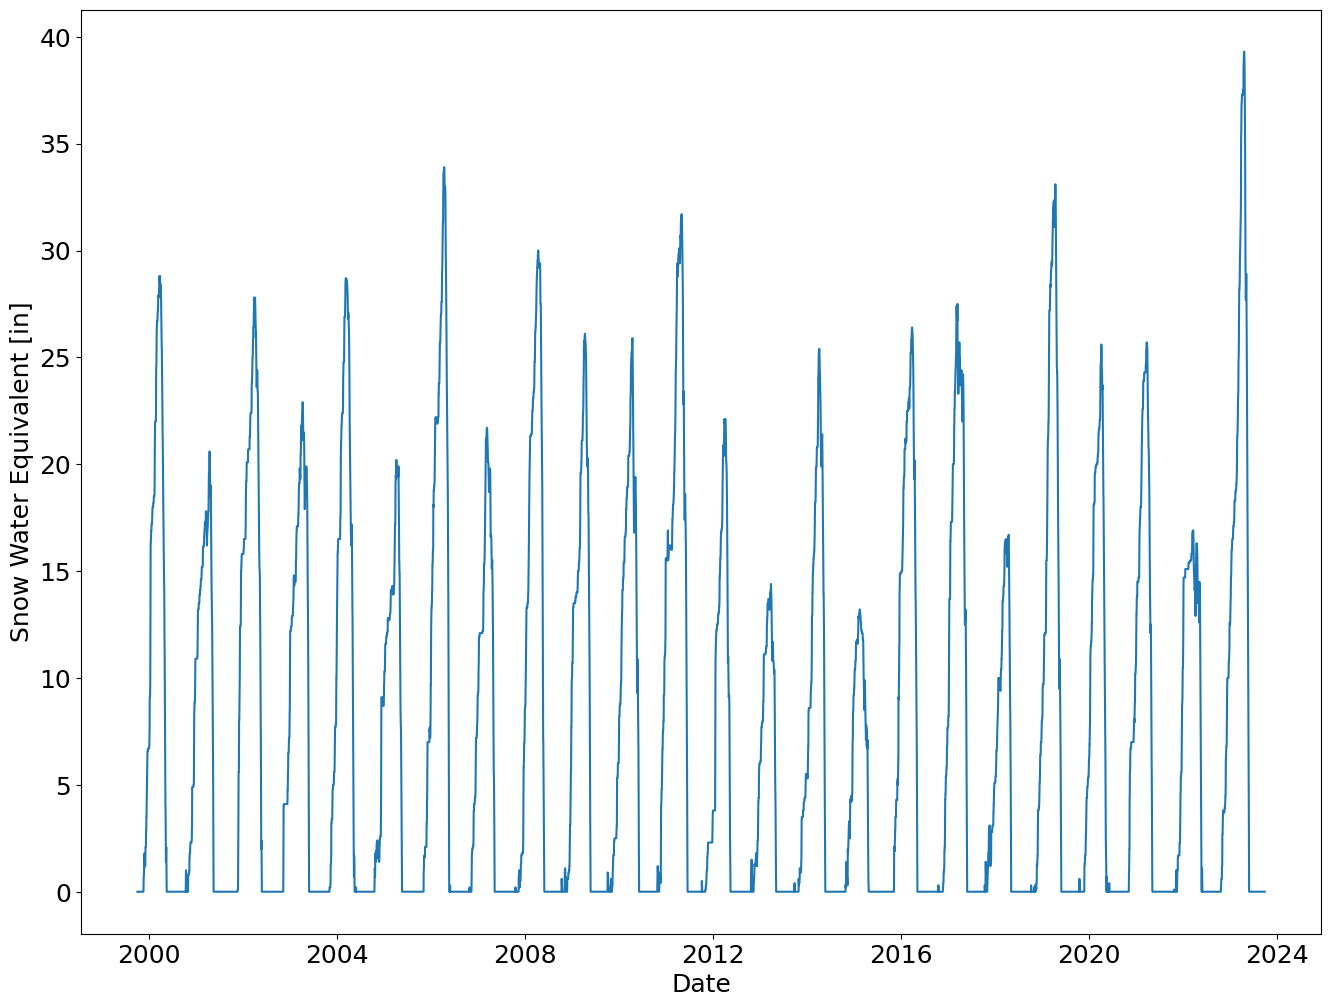

In [3]:
fig = plt.figure(figsize=(16,12))

plt.rcParams.update({'font.size': 18})
plt.plot(df['Date'], df['Snow Water Equivalent (in)'])
plt.xlabel('Date')
plt.ylabel('Snow Water Equivalent [in]')
plt.show()


### 4. Create a New DataFrame

Create a new dataframe where we will store values of interest in SI units. These variables include the date, snow water equivalent, precipitation increment, maximum air temperature for the day, minimum air temperature for the day, and mean air temperature for the day. Below the variables are converted from Imperial to SI unitsin the process of being added to the new dataframe.

In [4]:
in_to_mm = 25.4
degF_to_degC_mult = 5.0/9.0
degF_to_degC_const = 32.0

df_clean = pd.DataFrame()

df_clean['Date'] = df['Date']
df_clean['Snow Water Equivalent [mm]'] = df['Snow Water Equivalent (in)']*in_to_mm
df_clean['Accumulated Precipitation [mm]'] = df['Accumulated Precipitation (in)']*in_to_mm
df_clean['Precipitation Increment [mm]'] = df['Precipitation increment (in)']*in_to_mm
df_clean['Tmax (degC)'] = (df['Tmax (degF)'] - degF_to_degC_const)*degF_to_degC_mult
df_clean['Tmin (degC)'] = (df['Tmin (degF)'] - degF_to_degC_const)*degF_to_degC_mult
df_clean['Tmean (degC)'] = (df['Tmean (degF)'] - degF_to_degC_const)*degF_to_degC_mult


Now add other derived columns to the dataframe. Create a column each for: (1) the year of each record, (2) the day of year of each record, and (3) whether there was snow on the ground based on SWE > 1.0 mm 

In [5]:
df_clean['Year'] = pd.Series(df_clean['Date']).dt.year
df_clean['DOY'] = pd.Series(df_clean['Date']).dt.dayofyear
df_clean['Snow on Ground'] = np.where(df_clean['Snow Water Equivalent [mm]']>1.0,1,0)
df_clean.set_index('Date', inplace=True)
df_clean.head()

,Snow Water Equivalent [mm],Accumulated Precipitation [mm],Precipitation Increment [mm],Tmax (degC),Tmin (degC),Tmean (degC),Year,DOY,Snow on Ground
Date,,,,,,,,,
1999-10-01,0.0,0.0,0.0,11.722222,2.888889,7.500000,1999,274,0
1999-10-02,0.0,0.0,0.0,11.611111,0.500000,6.277778,1999,275,0
1999-10-03,0.0,0.0,0.0,14.388889,0.500000,7.777778,1999,276,0
1999-10-04,0.0,0.0,0.0,19.722222,6.777778,13.500000,1999,277,0
1999-10-05,0.0,0.0,0.0,16.888889,8.111111,12.388889,1999,278,0


Save the dataframe to the output file:

In [6]:
df_clean.to_csv(snotel_fname_clean,float_format='%.3f')


### 5. Plot Snow on Ground 

Plot the snow on ground variable to ensure that it behaves as we would expect. That is long periods of snow on the ground, interspersed with long periods without snow present. There may be some alternation between these during the beginning and end of the seasonal snowpack season.

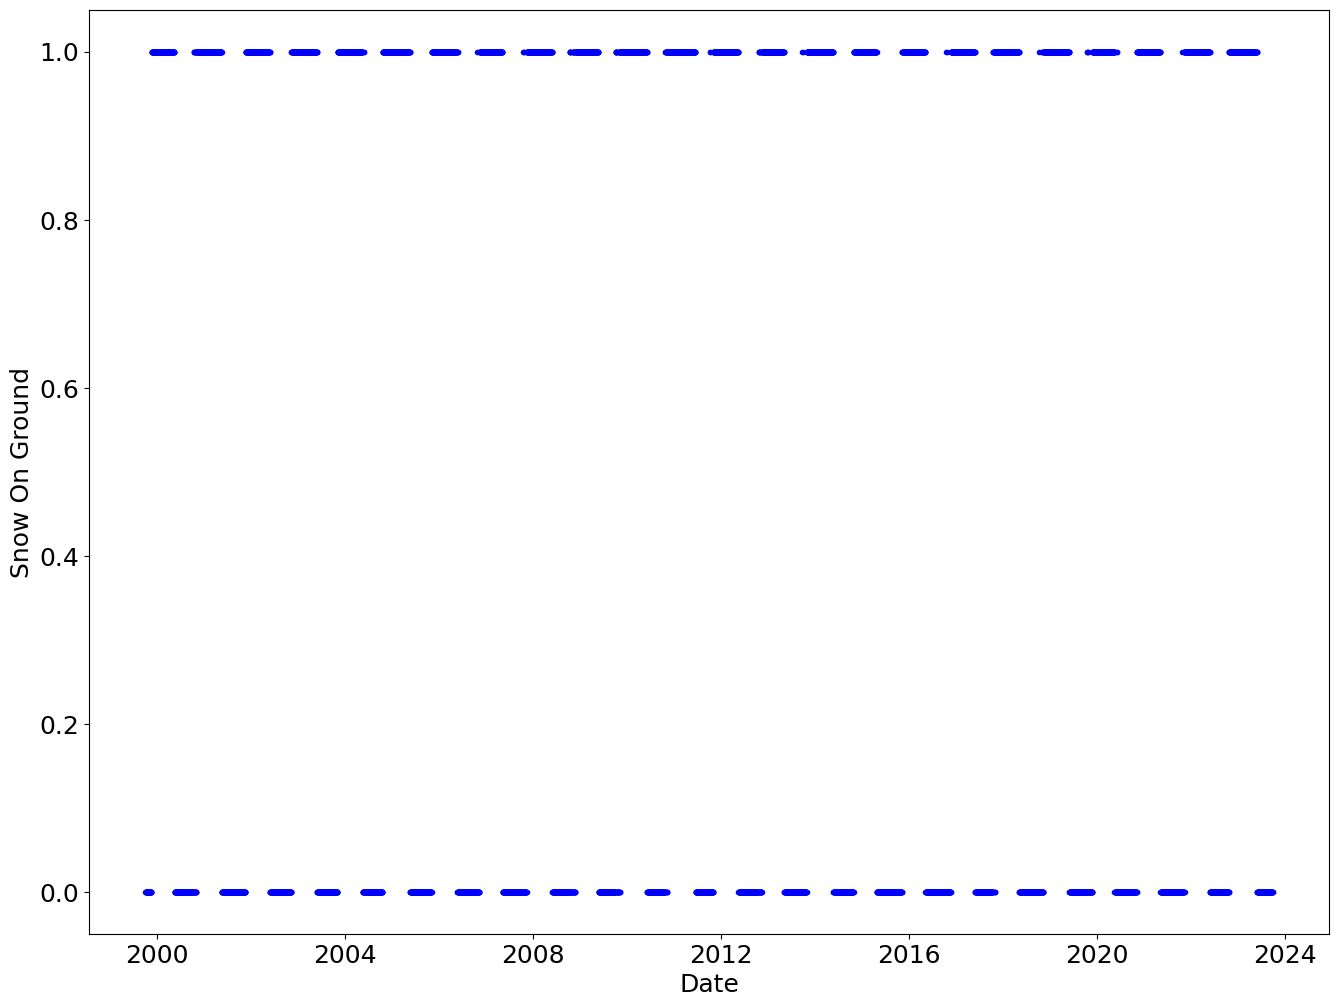

In [7]:
fig = plt.figure(figsize=(16,12))

plt.rcParams.update({'font.size': 18})
plt.plot(df_clean.index, df_clean['Snow on Ground'],'b.')
plt.xlabel('Date')
plt.ylabel('Snow On Ground')
plt.show()